#Bailey Sanden Final Project 

#To begin I used a python `xport` command to convert the files from XPT format to CSV format.  This was done in a terminal with the following command for each file: `python -m xport PFQ_J.XPT > pfq_j.csv`.  This was the most effecient way to convert the data to a readable format.  Both the CSV and XPT files are included in the upload.

In [2]:
import pandas as pd
  
# reading csv files
data1 = pd.read_csv('bmx_j.csv')
data2 = pd.read_csv('demo_j.csv')
data3 = pd.read_csv('dpq_j.csv')
data4 = pd.read_csv('inq_j.csv')
data5 = pd.read_csv('mcq_j.csv')
data6 = pd.read_csv('pfq_j.csv')
data7 = pd.read_csv('smq_j.csv')
data8 = pd.read_csv('hiq_j.csv')
  
# using merge function by setting how='inner'
output1 = pd.merge(data1, data2, 
                   on='SEQN', 
                   how='inner')
output2 = pd.merge(output1, data3, 
                   on='SEQN', 
                   how='inner')
output3 = pd.merge(output2, data4, 
                   on='SEQN', 
                   how='inner')
output4 = pd.merge(output3, data5, 
                   on='SEQN', 
                   how='inner')
output5 = pd.merge(output4, data6, 
                   on='SEQN', 
                   how='inner')
output6 = pd.merge(output5, data7, 
                   on='SEQN', 
                   how='inner')
output7 = pd.merge(output6, data8, 
                   on='SEQN', 
                   how='inner')
  

df = pd.DataFrame(output7)
df.to_csv('merged_data.csv', index=False)
df.to_excel('merged_data.xlsx', index=False)


In [3]:
import math
import pandas as pd

datafile = pd.read_excel("merged_data.xlsx")
datafile = pd.DataFrame(datafile)

# add new colums for the age grouping and total DPQ scores
datafile['AGE_GROUP'] = datafile.apply(lambda row: 'Over 60' if row.RIDAGEYR > 60 else ('Between 30-60' if (row.RIDAGEYR >= 30 and row.RIDAGEYR <= 60) else 'Below 30'), axis=1) 
datafile['DPQ_total'] = datafile.DPQ010 + datafile.DPQ020 + datafile.DPQ030 + datafile.DPQ040 + datafile.DPQ050 + datafile.DPQ060 + datafile.DPQ070 + datafile.DPQ080 + datafile.DPQ090 + datafile.DPQ100


In [4]:
# filter by those who completed the NHANES mental health dpression screener
datafile_mental = datafile[(datafile.DPQ010.lt(4)) & (datafile.DPQ020.lt(4)) & (datafile.DPQ030.lt(4))& (datafile.DPQ040.lt(4))& (datafile.DPQ050.lt(4))& (datafile.DPQ060.lt(4))& (datafile.DPQ070.lt(4))& (datafile.DPQ080.lt(4))& (datafile.DPQ090.lt(4))& (datafile.DPQ100.lt(4))]

In [5]:
#filtering by age to look at those 60 and older 
print('Total participants: {}'.format(datafile.SEQN.count()))
datafile_age = datafile[datafile.RIDAGEYR.gt(60)]
print('Participants 60 and Older: {}'.format(datafile_age.SEQN.count()))

Total participants: 5533
Participants 60 and Older: 1882


In [6]:
# Filter by those 60 and older who completed the NHANES mental health depression screener 
datafile_age_mental = datafile_age[(datafile_age.DPQ010.lt(4)) & (datafile_age.DPQ020.lt(4)) & (datafile_age.DPQ030.lt(4))& (datafile_age.DPQ040.lt(4))& (datafile_age.DPQ050.lt(4))& (datafile_age.DPQ060.lt(4))& (datafile_age.DPQ070.lt(4))& (datafile_age.DPQ080.lt(4))& (datafile_age.DPQ090.lt(4))& (datafile_age.DPQ100.lt(4))]
print('Participants 60 and Older Who Completed the Depression Screener: {}'.format(datafile_age_mental.SEQN.count()))

Participants 60 and Older Who Completed the Depression Screener: 1057


In [7]:
#Filter by those 60+ with depression screener completed by Female(2) and Male(1)gender 
datafile_age_mental_f = datafile_age_mental[datafile_age_mental.RIAGENDR.gt(1)]
print('Participants 60 and Older Who Completed the Depression Screener and are Female: {}'.format(datafile_age_mental_f.SEQN.count()))
datafile_age_mental_m = datafile_age_mental[datafile_age_mental.RIAGENDR.lt(2)]
print('Participants 60 and Older Who Completed the Depression Screener and are Male: {}'.format(datafile_age_mental_m.SEQN.count()))

Participants 60 and Older Who Completed the Depression Screener and are Female: 584
Participants 60 and Older Who Completed the Depression Screener and are Male: 473


In [8]:
# Filter by those 60 and older who completed the NHANES mental health depression screener and have a higher score as defined as at least one score = 3
datafile_age_high_mental = datafile_age[(datafile_age.DPQ010== 3) | (datafile_age.DPQ020== 3) | (datafile_age.DPQ030== 3) | (datafile_age.DPQ040== 3)| (datafile_age.DPQ050== 3)| (datafile_age.DPQ060== 3)|(datafile_age.DPQ070== 3)| (datafile_age.DPQ080== 3)| (datafile_age.DPQ090== 3)|(datafile_age.DPQ100== 3)]
print('Participants 60 and Older Who Completed the Depression Screener with the higher score: {}'.format(datafile_age_mental.SEQN.count()))

#Filter by # Filter by those 60 and older who completed the NHANES mental health depression screener and have a higher score as defined as at least one score = 3 and Race/hispanic origin
datafile_age_mexican_high_mental = datafile_age_high_mental[datafile_age_high_mental.RIDRETH3 == 1]
print('Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Mexcian Origin: {}'.format(datafile_age_mexican_high_mental.SEQN.count()))

datafile_age_ohispnic_high_mental = datafile_age_high_mental[datafile_age_high_mental.RIDRETH3 == 2]
print('Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Other Hispanic Origin: {}'.format(datafile_age_ohispnic_high_mental.SEQN.count()))

datafile_age_white_high_mental = datafile_age_high_mental[datafile_age_high_mental.RIDRETH3 == 3]
print('Participants 60 and Older Who Completed the Depression Screener with a higher score and are of White Origin: {}'.format(datafile_age_white_high_mental.SEQN.count()))

datafile_age_black_high_mental = datafile_age_high_mental[datafile_age_high_mental.RIDRETH3 == 4]
print('Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Black Origin: {}'.format(datafile_age_black_high_mental.SEQN.count()))

datafile_age_asian_high_mental = datafile_age_high_mental[datafile_age_high_mental.RIDRETH3 == 6]
print('Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Asian Origin: {}'.format(datafile_age_asian_high_mental.SEQN.count()))

datafile_age_other_high_mental = datafile_age_high_mental[datafile_age_high_mental.RIDRETH3 == 7]
print('Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Other Origin: {}'.format(datafile_age_other_high_mental.SEQN.count()))

Participants 60 and Older Who Completed the Depression Screener with the higher score: 1057
Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Mexcian Origin: 45
Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Other Hispanic Origin: 35
Participants 60 and Older Who Completed the Depression Screener with a higher score and are of White Origin: 165
Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Black Origin: 76
Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Asian Origin: 28
Participants 60 and Older Who Completed the Depression Screener with a higher score and are of Other Origin: 13


In [9]:
#Filtering by those 60+ with depression screener completed by Race/Hispanic origin 
datafile_age_mexican_mental = datafile_age_mental[datafile_age_mental.RIDRETH3 == 1]
print('Participants 60 and Older Who Completed the Depression Screener and are of Mexcian Origin: {}'.format(datafile_age_mexican_mental.SEQN.count()))

datafile_age_ohispnic_mental = datafile_age_mental[datafile_age_mental.RIDRETH3 == 2]
print('Participants 60 and Older Who Completed the Depression Screener and are of Other Hispanic Origin: {}'.format(datafile_age_ohispnic_mental.SEQN.count()))

datafile_age_white_mental = datafile_age_mental[datafile_age_mental.RIDRETH3 == 3]
print('Participants 60 and Older Who Completed the Depression Screener and are of White Origin: {}'.format(datafile_age_white_mental.SEQN.count()))

datafile_age_black_mental = datafile_age_mental[datafile_age_mental.RIDRETH3 == 4]
print('Participants 60 and Older Who Completed the Depression Screener and are of Black Origin: {}'.format(datafile_age_black_mental.SEQN.count()))

datafile_age_asian_mental = datafile_age_mental[datafile_age_mental.RIDRETH3 == 6]
print('Participants 60 and Older Who Completed the Depression Screener and are of Asian Origin: {}'.format(datafile_age_asian_mental.SEQN.count()))

datafile_age_other_mental = datafile_age_mental[datafile_age_mental.RIDRETH3 == 7]
print('Participants 60 and Older Who Completed the Depression Screener and are of Other Origin: {}'.format(datafile_age_other_mental.SEQN.count()))

Participants 60 and Older Who Completed the Depression Screener and are of Mexcian Origin: 99
Participants 60 and Older Who Completed the Depression Screener and are of Other Hispanic Origin: 105
Participants 60 and Older Who Completed the Depression Screener and are of White Origin: 500
Participants 60 and Older Who Completed the Depression Screener and are of Black Origin: 233
Participants 60 and Older Who Completed the Depression Screener and are of Asian Origin: 81
Participants 60 and Older Who Completed the Depression Screener and are of Other Origin: 39


In [10]:
#Filtering by gender of those 60 and older who completed the depression screener and have a high score of 3 
datafile_age_high_mental_f = datafile_age_high_mental[datafile_age_high_mental.RIAGENDR.gt(1)]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher score and are Female: {}'.format(datafile_age_high_mental_f.SEQN.count()))
datafile_age_high_mental_m = datafile_age_high_mental[datafile_age_high_mental.RIAGENDR.lt(2)]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher score and are Male: {}'.format(datafile_age_high_mental_m.SEQN.count()))

Participants 60 and Older Who Completed the Depression Screener with a Higher score and are Female: 219
Participants 60 and Older Who Completed the Depression Screener with a Higher score and are Male: 143


In [11]:
#filtering by those 60+ with depression screener completed and are smokers currently and those who have smoked more than 100 cigs 
datafile_age_smoke_mental = datafile_age_mental[(datafile_age_mental.SMQ040 == 1) | (datafile_age_mental.SMQ040 == 2)]
print('Participants 60 and Older Who Completed the Depression Screener and are Currently Smokers: {}'.format(datafile_age_smoke_mental.SEQN.count()))

datafile_age_smoke_hund_mental = datafile_age_mental[datafile_age_mental.SMQ020 == 1]
print('Participants 60 and Older Who Completed the Depression Screener and have Smoked 100 Cigarettes im Their Life: {}'.format(datafile_age_smoke_hund_mental.SEQN.count()))

#filtering by those 60+ with depression screener completed with a higher score and are smokers currently and those who have smoked more than 100 cigs 
datafile_age_smoke_high_mental = datafile_age_high_mental[(datafile_age_high_mental.SMQ040 == 1) | (datafile_age_high_mental.SMQ040 == 2)]
print('Participants 60 and Older Who Completed the Depression Screener with a higher Score and are Currently Smokers: {}'.format(datafile_age_smoke_high_mental.SEQN.count()))

datafile_age_smoke_hund_high_mental = datafile_age_high_mental[datafile_age_high_mental.SMQ020 == 1]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and have Smoked 100 Cigarettes im Their Life: {}'.format(datafile_age_smoke_hund_high_mental.SEQN.count()))



Participants 60 and Older Who Completed the Depression Screener and are Currently Smokers: 156
Participants 60 and Older Who Completed the Depression Screener and have Smoked 100 Cigarettes im Their Life: 558
Participants 60 and Older Who Completed the Depression Screener with a higher Score and are Currently Smokers: 55
Participants 60 and Older Who Completed the Depression Screener with a Higher Score and have Smoked 100 Cigarettes im Their Life: 193


In [12]:
#filtering by those 60+ with depression screener completed and their BMI categories as defined by the WHO 
# below 18.5 (underweight), 18.5-24.9 (normal), 25.0-29.9 (pre-obesity), 30.0-34.9 (obesity class I), 35.0-39.9 (obesity class II), Above 40 (obesity class III)

datafile_age_mental_under_bmi = datafile_age_mental[(datafile_age_mental.BMXBMI.lt(18.5))]
print('Participants 60 and Older Who Completed the Depression Screener and Underweight BMI {}'.format(datafile_age_mental_under_bmi.SEQN.count()))

datafile_age_mental_normal_bmi = datafile_age_mental[(datafile_age_mental.BMXBMI.gt(18.49)) & (datafile_age_mental.BMXBMI.lt(25.0))]
print('Participants 60 and Older Who Completed the Depression Screener and Normal BMI {}'.format(datafile_age_mental_normal_bmi.SEQN.count()))

datafile_age_mental_preobesity_bmi = datafile_age_mental[(datafile_age_mental.BMXBMI.gt(24.99)) & (datafile_age_mental.BMXBMI.lt(30.0))]
print('Participants 60 and Older Who Completed the Depression Screener and Pre-Obesity BMI {}'.format(datafile_age_mental_preobesity_bmi.SEQN.count()))

datafile_age_mental_obesityI_bmi = datafile_age_mental[(datafile_age_mental.BMXBMI.gt(29.99)) & (datafile_age_mental.BMXBMI.lt(35.0))]
print('Participants 60 and Older Who Completed the Depression Screener and Obesity Class I BMI {}'.format(datafile_age_mental_obesityI_bmi.SEQN.count()))

datafile_age_mental_obesityII_bmi = datafile_age_mental[(datafile_age_mental.BMXBMI.gt(34.99)) & (datafile_age_mental.BMXBMI.lt(40.0))]
print('Participants 60 and Older Who Completed the Depression Screener and Obesity Class II BMI {}'.format(datafile_age_mental_obesityII_bmi.SEQN.count()))

datafile_age_mental_obesityIII_bmi = datafile_age_mental[(datafile_age_mental.BMXBMI.gt(39.99))]
print('Participants 60 and Older Who Completed the Depression Screener and Obesity Class III BMI {}'.format(datafile_age_mental_obesityIII_bmi.SEQN.count()))

#filtering by Higher BMI (obesity class I,II, and III) and Higher depression score as defined as a score with one =3

datafile_age_high_bmi_high_mental = datafile_age_high_mental[datafile_age_high_mental.BMXBMI.gt(29.99)]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher BMI: {}'.format(datafile_age_high_bmi_high_mental.SEQN.count()))

#fitering by lower bmi (underweight) and Higher Depression Scores

datafile_age_under_bmi_high_mental = datafile_age_high_mental[(datafile_age_high_mental.BMXBMI.lt(18.5))]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Lower BMI: {}'.format(datafile_age_under_bmi_high_mental.SEQN.count()))


Participants 60 and Older Who Completed the Depression Screener and Underweight BMI 10
Participants 60 and Older Who Completed the Depression Screener and Normal BMI 215
Participants 60 and Older Who Completed the Depression Screener and Pre-Obesity BMI 356
Participants 60 and Older Who Completed the Depression Screener and Obesity Class I BMI 262
Participants 60 and Older Who Completed the Depression Screener and Obesity Class II BMI 126
Participants 60 and Older Who Completed the Depression Screener and Obesity Class III BMI 71
Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher BMI: 171
Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Lower BMI: 5


In [13]:
#Filtering by those 60+ who completed their depression screener and their physcial functioning 
datafile_age_low_pf = datafile_age_high_mental[(datafile_age_high_mental.PFQ049== 1) | (datafile_age_high_mental.PFQ051== 1) | (datafile_age_high_mental.PFQ054== 1) | (datafile_age_high_mental.PFQ057== 1)| (datafile_age_high_mental.PFQ059== 1)| (datafile_age_high_mental.PFQ061A.gt(1) & datafile_age_high_mental.PFQ061A.lt(5) )|(datafile_age_high_mental.PFQ061B.gt(1) & datafile_age_high_mental.PFQ061B.lt(5))| (datafile_age_high_mental.PFQ061C.gt(1) & datafile_age_high_mental.PFQ061C.lt(5))| (datafile_age_high_mental.PFQ061D.gt(1) & datafile_age_high_mental.PFQ061D.lt(5))| (datafile_age_high_mental.PFQ061E.gt(1) & datafile_age_high_mental.PFQ061E.lt(5))| (datafile_age_high_mental.PFQ061F.gt(1) & datafile_age_high_mental.PFQ061F.lt(5))]
print('Participants 60 and Older Who Completed the Depression Screener with lower physcial function: {}'.format(datafile_age_low_pf.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and Lower Physcial Functioning {}'.format(datafile_age_low_pf.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))


Participants 60 and Older Who Completed the Depression Screener with lower physcial function: 312
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and Lower Physcial Functioning 86.1878453038674


In [14]:
#Filtering by those 60+ who completed their depression screener with higher depression scores and more serious medical condtions 

datafile_age_high_mental_medical_cond = datafile_age_high_mental[(datafile_age_high_mental.MCQ053== 1) |(datafile_age_high_mental.MCQ092== 1) | (datafile_age_high_mental.MCQ160A== 1) | (datafile_age_high_mental.MCQ160B== 1) | (datafile_age_high_mental.MCQ160C== 1) |  (datafile_age_high_mental.MCQ160E == 1) | (datafile_age_high_mental.MCQ160F== 1) | (datafile_age_high_mental.MCQ160M== 1) |  (datafile_age_high_mental.MCQ160L== 1) |  (datafile_age_high_mental.MCQ510A== 1) |  (datafile_age_high_mental.MCQ220== 1)]

print('Participants 60 and Older Who Completed the Depression Screener with more Serious Medical Condtions: {}'.format(datafile_age_high_mental_medical_cond.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and more Serious Medcial Conditions {}'.format(datafile_age_high_mental_medical_cond.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))



Participants 60 and Older Who Completed the Depression Screener with more Serious Medical Condtions: 309
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and more Serious Medcial Conditions 85.35911602209944


In [15]:
#Filter by those 60+ who completed their depression screener with higher depression scores and education level 
#lower education as defined by High school graduate/ GED or equilavent or less 
datafile_age_low_ed_high_mental = datafile_age_high_mental[datafile_age_high_mental.DMDEDUC2.lt(4)]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Lower Education: {}'.format(datafile_age_low_ed_high_mental.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and Lower Education {}'.format(datafile_age_low_ed_high_mental.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))

#Medium education as defined by some college of AA degree 
datafile_age_med_ed_high_mental = datafile_age_high_mental[(datafile_age_high_mental.DMDEDUC2 == 4)]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Some Higher Education: {}'.format(datafile_age_med_ed_high_mental.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and Some Higher Education {}'.format(datafile_age_med_ed_high_mental.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))

#High education defined by College Graduate or Above 
datafile_age_high_ed_high_mental = datafile_age_high_mental[(datafile_age_high_mental.DMDEDUC2 == 5)]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher Education: {}'.format(datafile_age_high_ed_high_mental.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and Higher Education {}'.format(datafile_age_high_ed_high_mental.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))



Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Lower Education: 219
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and Lower Education 60.49723756906077
Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Some Higher Education: 98
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and Some Higher Education 27.071823204419886
Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher Education: 42
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and Higher Education 11.602209944751381


In [16]:
#Filter by those 60+ who completed their depression screener with lower and higher poverty ratio's
# the lower the ratio, the closer related poverty and family income are
datafile_age_high_poverty_high_mental = datafile_age_high_mental[(datafile_age_high_mental.INDFMPIR.lt(5))]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher Poverty: {}'.format(datafile_age_high_poverty_high_mental.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and Higher Poverty {}'.format(datafile_age_high_poverty_high_mental.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))

# the higher the ratio, the less related to poverty and family income are
datafile_age_low_poverty_high_mental = datafile_age_high_mental[(datafile_age_high_mental.INDFMPIR.gt(4.98))]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher Poverty: {}'.format(datafile_age_low_poverty_high_mental.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and Higher Poverty {}'.format(datafile_age_low_poverty_high_mental.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))

Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher Poverty: 281
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and Higher Poverty 77.62430939226519
Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Higher Poverty: 32
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and Higher Poverty 8.83977900552486


In [17]:
#Filter by those 60+ who completed their depression screener with are covered by Medicare
datafile_age_medicare_high_mental = datafile_age_high_mental[(datafile_age_high_mental.HIQ031B == 15)]
print('Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Covered by Medicare: {}'.format(datafile_age_medicare_high_mental.SEQN.count()))
print('Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: {}'.format(datafile_age_high_mental.SEQN.count()))
print('Percentage of 60+ with Higher Depression and Medicare Coverage {}'.format(datafile_age_medicare_high_mental.SEQN.count() / datafile_age_high_mental.SEQN.count() * 100))

Participants 60 and Older Who Completed the Depression Screener with a Higher Score and Covered by Medicare: 262
Participants 60 and Older Who Completed the Depression Screener Higher Depression Score: 362
Percentage of 60+ with Higher Depression and Medicare Coverage 72.37569060773481


In [18]:
import numpy as np

#descriptive statistics of every column in the dataset- sum, mean, median, std, var, min, max
print("Number of non-null vlaues in each column:\n", datafile.count())
print("max of columns:\n", datafile.max())
print("min of columns:\n", datafile.min())
print("mean of columns:\n", datafile.mean())
print("median of columns:\n", datafile.median())
print("SD of columns:\n", datafile.std())
print("Variance of columns:\n", datafile.var())
print("correlation of columns:\n", datafile.corr())

#showing extra descriptive statistics of specfific variables needed to be easily viewed
datafile_mean_ridageyr= np.mean(datafile['RIDAGEYR'])
print('The Mean Age of All Partipicants {}'.format(datafile_mean_ridageyr))

datafile_age_mean_ridageyr= np.mean(datafile_age_mental['RIDAGEYR'])
print('The Mean Age of Partipicants 60 and Older {}'.format(datafile_age_mean_ridageyr))

print('Population size of 60 and Older: {}'.format(datafile_age.SEQN.count()))




Number of non-null vlaues in each column:
 SEQN         5533
BMDSTATS     5533
BMXWT        5444
BMIWT         234
BMXRECUM        0
             ... 
HIQ105       1075
HIQ270       4690
HIQ210       4690
AGE_GROUP    5533
DPQ_total    3362
Length: 254, dtype: int64
max of columns:
 SEQN          102956
BMDSTATS           4
BMXWT          242.6
BMIWT            4.0
BMXRECUM         NaN
              ...   
HIQ105           2.0
HIQ270           9.0
HIQ210           9.0
AGE_GROUP    Over 60
DPQ_total       35.0
Length: 252, dtype: object
min of columns:
 SEQN            93705
BMDSTATS            1
BMXWT            32.6
BMIWT             1.0
BMXRECUM          NaN
               ...   
HIQ105            1.0
HIQ270            1.0
HIQ210            1.0
AGE_GROUP    Below 30
DPQ_total         1.0
Length: 252, dtype: object
mean of columns:
 SEQN         98275.674679
BMDSTATS         1.138261
BMXWT           82.468993
BMIWT            3.000000
BMXRECUM              NaN
                 ...    

In [42]:
import math
from scipy import stats
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def calc_confidence_intervals(df1, df2, column, title, count):
    print(title)
    mean1 = float(df1[column].mean())
    print("mean1 = ",mean1)
    mean2 = float(df2[column].mean())
    print("mean2 = ",mean2)
    diff_means = mean1 - mean2
    print("diff in means = ",diff_means)
    std1 = float(df1[column].std())
    print("std1 = ",std1)
    std2 = float(df2[column].std())
    print("std2 = ",std2)
    N1 = df1.SEQN.count()
    print("N1 = ",N1)
    N2 = df2.SEQN.count()
    print("N2 = ",N2)
    var1 = pow(std1,2)/N1
    var2 = pow(std2,2)/N2
    print("std1^2 = ",pow(std1,2))
    print("std1^2 / N1 = ",var1)
    print("std2^2 = ",pow(std2,2))
    print("std2^2 / N2 = ",var2)

    confint_low = diff_means-1.96*math.sqrt(var1+var2)
    confint_high = diff_means+1.96*math.sqrt(var1+var2)
    confint = 1.96*math.sqrt(var1+var2)
    print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
    print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more depressed")

    ttest = stats.ttest_ind(df1[column],df2[column])
    print("HYPOTHESIS #{}".format(count))
    print("The t-test result for individauls {} scores is:".format(title))
    print("T-statistic = %.8f" % ttest.statistic," and p-value = %.8E" % (ttest.pvalue/2))
    print('\n')

list_of_conf_intervals = [
    {'df': datafile_age_high_mental, 'title': '60+ and high mental'}, 
    {'df': datafile_age_mexican_mental, 'title': '60+ hispanic high mental'}, 
    {'df': datafile_age_white_high_mental, 'title': '60+ hispanic high white'},
    {'df': datafile_age_high_poverty_high_mental, 'title': '60+ and high poverty high mental'},
    {'df': datafile_age_high_bmi_high_mental, 'title': '60+ and high BMI high mental'},
    {'df': datafile_age_under_bmi_high_mental, 'title': '60+ and low BMI high mental'},
    {'df': datafile_age_low_ed_high_mental, 'title': '60+ and low education high mental'},
    {'df': datafile_age_high_ed_high_mental, 'title': '60+ and high education high mental'},
    {'df': datafile_age_high_mental_medical_cond, 'title': '60+ and serious medical condtions high mental'},
    {'df': datafile_age_smoke_high_mental, 'title': '60+ and who currently smoke high mental'},
    {'df': datafile_age_medicare_high_mental, 'title': '60+ and who are covered by Medicare high mental'},
    {'df': datafile_age_low_pf, 'title': '60+ and who have low physcial function high mental'},
    {'df': datafile_age_high_mental_f, 'title': '60+ and who are female high mental'},
    {'df': datafile_age_high_mental_m, 'title': '60+ and who are male high mental'},
    {'df': datafile_age_low_poverty_high_mental, 'title': '60+ and low poverty high mental'},
]

for idx, obj in enumerate(list_of_conf_intervals):
    calc_confidence_intervals(obj['df'], datafile_mental, 'DPQ_total', obj['title'], idx+1)


60+ and high mental
mean1 =  9.472375690607734
mean2 =  5.2275717703349285
diff in means =  4.244803920272806
std1 =  5.585453940862963
std2 =  4.74519193604997
N1 =  362
N2 =  3344
std1^2 =  31.197295725501604
std1^2 / N1 =  0.08618037493232487
std2^2 =  22.516846509953663
std2^2 / N2 =  0.006733506731445473
95 CI = 4.245 +/- 0.597  OR [3.647 , 4.842 ]
Meaning we are 95% confident the difference in means falls between 3.647 and 4.842% more depressed
HYPOTHESIS #1
The t-test result for individauls 60+ and high mental scores is:
T-statistic = 15.87191475  and p-value = 3.08735172E-55


60+ hispanic high mental
mean1 =  6.070707070707071
mean2 =  5.2275717703349285
diff in means =  0.8431353003721425
std1 =  5.16118267820532
std2 =  4.74519193604997
N1 =  99
N2 =  3344
std1^2 =  26.637806637806637
std1^2 / N1 =  0.2690687539172388
std2^2 =  22.516846509953663
std2^2 / N2 =  0.006733506731445473
95 CI = 0.843 +/- 1.029  OR [-0.186 , 1.872 ]
Meaning we are 95% confident the difference in m

[Text(0.5, 1.0, 'Overall 60+ Depression Scores')]

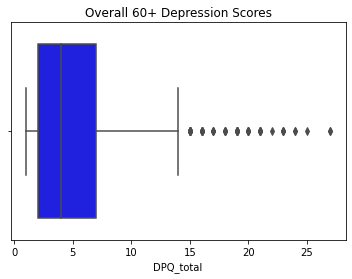

In [20]:
# load packages we will be usig for plotting
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(data=datafile_age_mental, x="DPQ_total",color="blue").set(title='Overall 60+ Depression Scores')

[Text(0.5, 1.0, 'Females 60+ Depression Scores')]

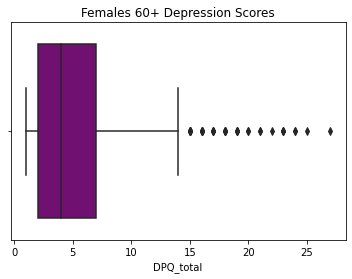

In [21]:
#boxplot to obesrve female outliers

sns.boxplot(data=datafile_age_mental_f, x="DPQ_total",color="purple").set(title='Females 60+ Depression Scores')

[Text(0.5, 1.0, 'Males 60+ Depression Scores')]

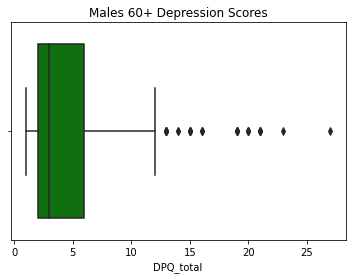

In [22]:
#boxplot to obesrve male outliers
sns.boxplot(data=datafile_age_mental_m, x="DPQ_total",color="green").set(title='Males 60+ Depression Scores')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores')]

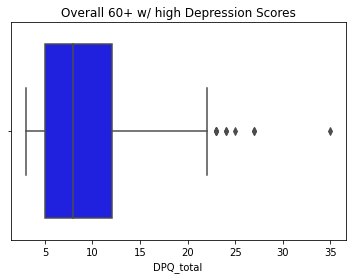

In [23]:
#boxplot to observe outliers of the dataset with 60+ higher depression
sns.boxplot(data=datafile_age_high_mental, x="DPQ_total",color="blue").set(title='Overall 60+ w/ high Depression Scores')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and are female')]

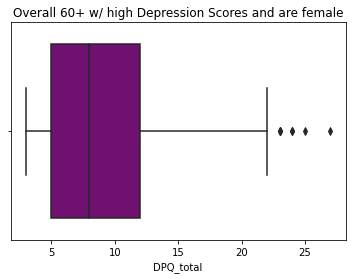

In [24]:
#boxplot to observe outliers of the dataset with 60+ higher depression who are female
sns.boxplot(data=datafile_age_high_mental_f, x="DPQ_total",color="purple").set(title='Overall 60+ w/ high Depression Scores and are female')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and are Male')]

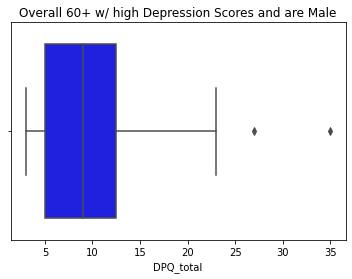

In [25]:
#boxplot to observe outliers of the dataset with 60+ higher depression who are Male
sns.boxplot(data=datafile_age_high_mental_m, x="DPQ_total",color="blue").set(title='Overall 60+ w/ high Depression Scores and are Male')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and are Hispanic')]

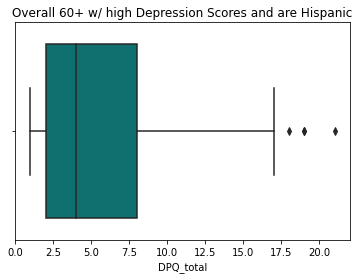

In [26]:
#boxplot to observe outliers of the dataset with 60+ higher depression who are Hispanic
sns.boxplot(data=datafile_age_mexican_mental, x="DPQ_total",color="teal").set(title='Overall 60+ w/ high Depression Scores and are Hispanic')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and have higher poverty')]

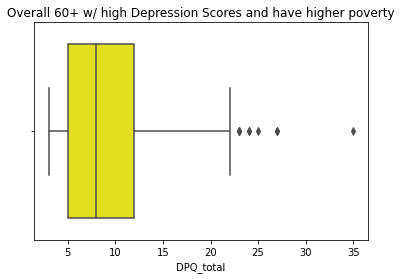

In [27]:
#boxplot to observe outliers of the dataset with 60+ higher depression who are higher poverty
sns.boxplot(data=datafile_age_high_poverty_high_mental, x="DPQ_total",color="yellow").set(title='Overall 60+ w/ high Depression Scores and have higher poverty')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and have higher BMI')]

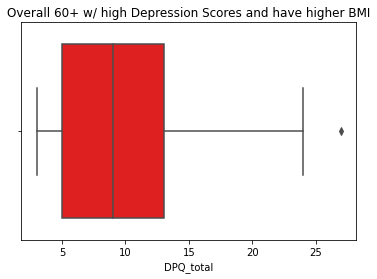

In [28]:
#boxplot to observe outliers of the dataset with 60+ higher depression who are higher BMI
sns.boxplot(data=datafile_age_high_bmi_high_mental, x="DPQ_total",color="red").set(title='Overall 60+ w/ high Depression Scores and have higher BMI')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and have lower education')]

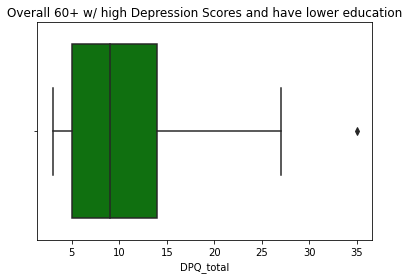

In [29]:
#boxplot to observe outliers of the dataset with 60+ higher depression who have lower education
sns.boxplot(data=datafile_age_low_ed_high_mental, x="DPQ_total",color="green").set(title='Overall 60+ w/ high Depression Scores and have lower education')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and have higher education')]

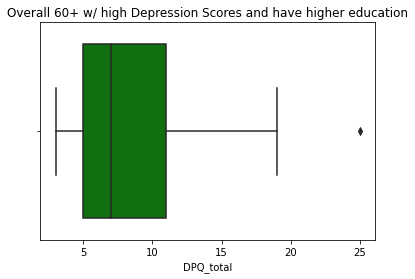

In [30]:
#boxplot to observe outliers of the dataset with 60+ higher depression who have higher education
sns.boxplot(data=datafile_age_high_ed_high_mental, x="DPQ_total",color="green").set(title='Overall 60+ w/ high Depression Scores and have higher education')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and more serious Medical Condtions')]

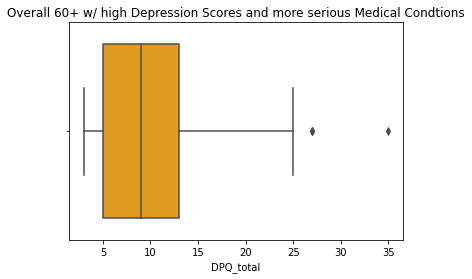

In [31]:
#boxplot to observe outliers of the dataset with 60+ higher depression who have a more serious medical condtion
sns.boxplot(data=datafile_age_high_mental_medical_cond, x="DPQ_total",color="orange").set(title='Overall 60+ w/ high Depression Scores and more serious Medical Condtions')


[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and are currrently smoking')]

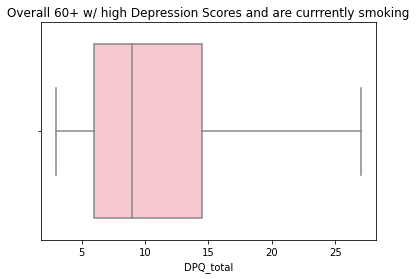

In [32]:
#boxplot to observe outliers of the dataset with 60+ higher depression who currently smoke
sns.boxplot(data=datafile_age_smoke_high_mental, x="DPQ_total",color="pink").set(title='Overall 60+ w/ high Depression Scores and are currrently smoking')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and are currrently covered by Medicare')]

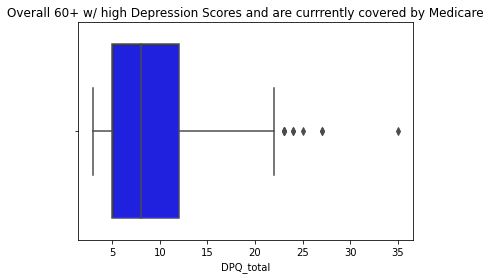

In [33]:
#boxplot to observe outliers of the dataset with 60+ higher depression who currently covered by Medicare
sns.boxplot(data=datafile_age_medicare_high_mental, x="DPQ_total",color="blue").set(title='Overall 60+ w/ high Depression Scores and are currrently covered by Medicare')

[Text(0.5, 1.0, 'Overall 60+ w/ high Depression Scores and have low physical functioning')]

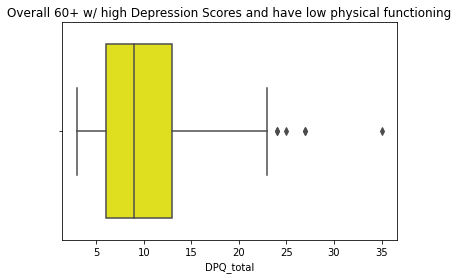

In [34]:
#boxplot to observe outliers of the dataset with 60+ higher depression who have low physcial function
sns.boxplot(data=datafile_age_low_pf, x="DPQ_total",color="yellow").set(title='Overall 60+ w/ high Depression Scores and have low physical functioning')

[Text(0.5, 1.0, 'Overall 60+ Depression Scores')]

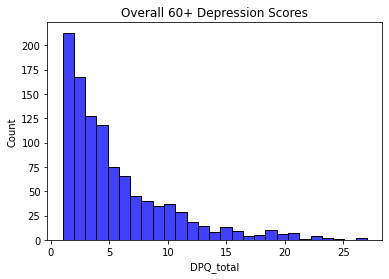

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

#Histogram showing depression scores of those 60+
sns.histplot(data=datafile_age_mental, x="DPQ_total",color="blue").set(title='Overall 60+ Depression Scores')


[Text(0.5, 1.0, 'Overall 60+ High Depression Scores')]

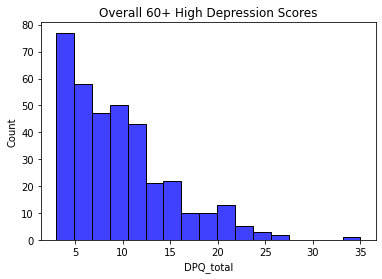

In [37]:
#Histogram showing depression scores of those 60+ w/ high scores
sns.histplot(data=datafile_age_high_mental, x="DPQ_total",color="blue").set(title='Overall 60+ High Depression Scores')

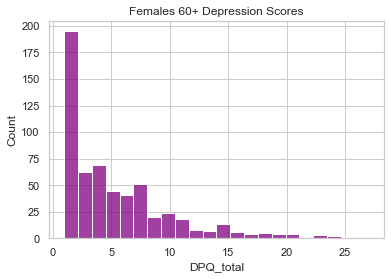

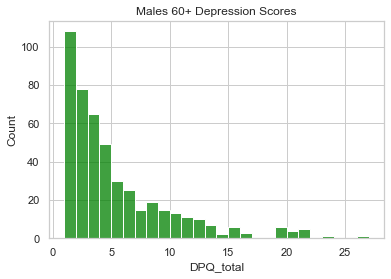

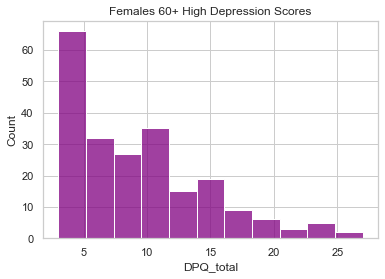

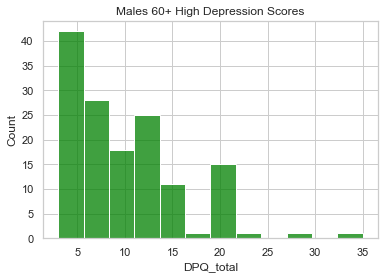

In [38]:
#Histogram showing depression scores of those 60+ for females and males and overall population
# libraries & dataset

#Females over 60 depression screening scores
sns.set(style="whitegrid")
sns.histplot(data=datafile_age_mental_f, x="DPQ_total",color="purple").set(title='Females 60+ Depression Scores')
plt.show()

#Males over 60 depression screening score 
sns.set(style="whitegrid")
sns.histplot(data=datafile_age_mental_m, x="DPQ_total",color="green").set(title='Males 60+ Depression Scores')
plt.show()

#Females over 60 high depression screening scores
sns.set(style="whitegrid")
sns.histplot(data=datafile_age_high_mental_f, x="DPQ_total",color="purple").set(title='Females 60+ High Depression Scores')
plt.show()

#Males over 60 high depression screening score 
sns.set(style="whitegrid")
sns.histplot(data=datafile_age_high_mental_m, x="DPQ_total",color="green").set(title='Males 60+ High Depression Scores')
plt.show()

[Text(0.5, 1.0, 'BMI vs Overall Depression Score 60+')]

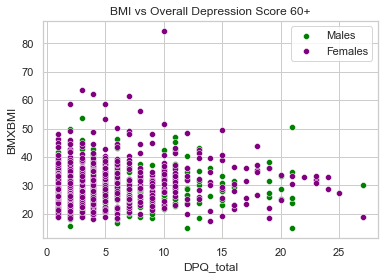

In [39]:
sns.scatterplot(data=datafile_age_mental_m, x="DPQ_total", y="BMXBMI",color="green",label="Males").set(title='BMI vs Overall Depression Score 60+')
sns.scatterplot(data=datafile_age_mental_f, x="DPQ_total", y="BMXBMI",color="purple",label="Females").set(title='BMI vs Overall Depression Score 60+')


[Text(0.5, 1.0, 'BMI vs Overall High Depression Score 60+')]

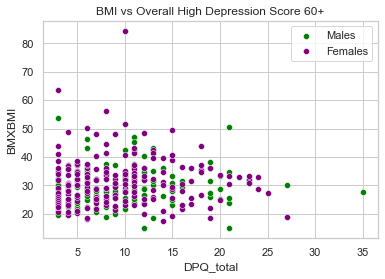

In [40]:
sns.scatterplot(data=datafile_age_high_mental_m, x="DPQ_total", y="BMXBMI",color="green",label="Males").set(title='BMI vs Overall High Depression Score 60+')
sns.scatterplot(data=datafile_age_high_mental_f, x="DPQ_total", y="BMXBMI",color="purple",label="Females").set(title='BMI vs Overall High Depression Score 60+')


[Text(0.5, 1.0, 'Counts of age groups')]

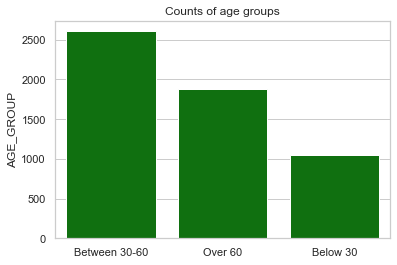

In [41]:
#bar chart with age range in the datafile overall
import numpy as np
datafile['AGE_GROUP'] = datafile.apply(lambda row: 'Over 60' if row.RIDAGEYR > 60 else ('Between 30-60' if (row.RIDAGEYR >= 30 and row.RIDAGEYR <= 60) else 'Below 30'), axis=1) 
sns.barplot(data=datafile, x=datafile.AGE_GROUP.value_counts().index, y=datafile.AGE_GROUP.value_counts(),color="green").set(title='Counts of age groups')